## Clustering On New Case Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("epi_gov_data_cleaned.csv")

df.head()

,Unnamed: 0,date,key,new_confirmed,new_deceased,total_confirmed,total_deceased,country_name,school_closing,workplace_closing,...,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,new_confirmed_norm
0,1,2019-12-31,AR,0,0,0,0,Argentina,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000000
1,2,2020-01-01,AR,3,0,3,0,Argentina,0,0,...,0,0,0,0,0,0,0,0,0.0,-0.230780
2,3,2020-01-02,AR,13,0,16,0,Argentina,0,0,...,0,0,0,0,0,0,0,0,0.0,-0.230370
3,4,2020-01-03,AR,0,0,16,0,Argentina,0,0,...,0,0,0,0,0,0,0,0,0.0,-0.230903
4,5,2020-01-04,AR,7,0,23,0,Argentina,0,0,...,0,0,0,0,0,0,0,0,0.0,-0.230616


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85562 entries, 0 to 85561
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          85562 non-null  int64  
 1   date                                85562 non-null  object 
 2   key                                 85562 non-null  object 
 3   new_confirmed                       85562 non-null  int64  
 4   new_deceased                        85562 non-null  int64  
 5   total_confirmed                     85562 non-null  int64  
 6   total_deceased                      85562 non-null  int64  
 7   country_name                        85562 non-null  object 
 8   school_closing                      85562 non-null  int64  
 9   workplace_closing                   85562 non-null  int64  
 10  cancel_public_events                85562 non-null  int64  
 11  restrictions_on_gatherings          85562

In [3]:
new_cases = df[["date", "country_name", "new_confirmed"]]

In [4]:
new_cases.head()

,date,country_name,new_confirmed
0,2019-12-31,Argentina,0
1,2020-01-01,Argentina,3
2,2020-01-02,Argentina,13
3,2020-01-03,Argentina,0
4,2020-01-04,Argentina,7


In [21]:
df.groupby("country_name").date.count().value_counts()

470    157
472     13
471      7
473      3
457      1
411      1
52       1
Name: date, dtype: int64

In [24]:
df.groupby("country_name").date.count().sort_values()

country_name
Macau           52
Hong Kong      411
Taiwan         457
Afghanistan    470
Mozambique     470
              ... 
Indonesia      472
Romania        472
Ukraine        473
Argentina      473
Mexico         473
Name: date, Length: 183, dtype: int64

In [12]:
new_cases = new_cases.pivot(index='date', columns='country_name', values='new_confirmed')

In [30]:
new_cases.fillna(0, inplace=True)

In [35]:
new_cases = new_cases[new_cases.index < "2021-04-15"]

In [36]:
new_cases.to_csv("new_cases_matrix.csv")

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(new_cases, method='ward')


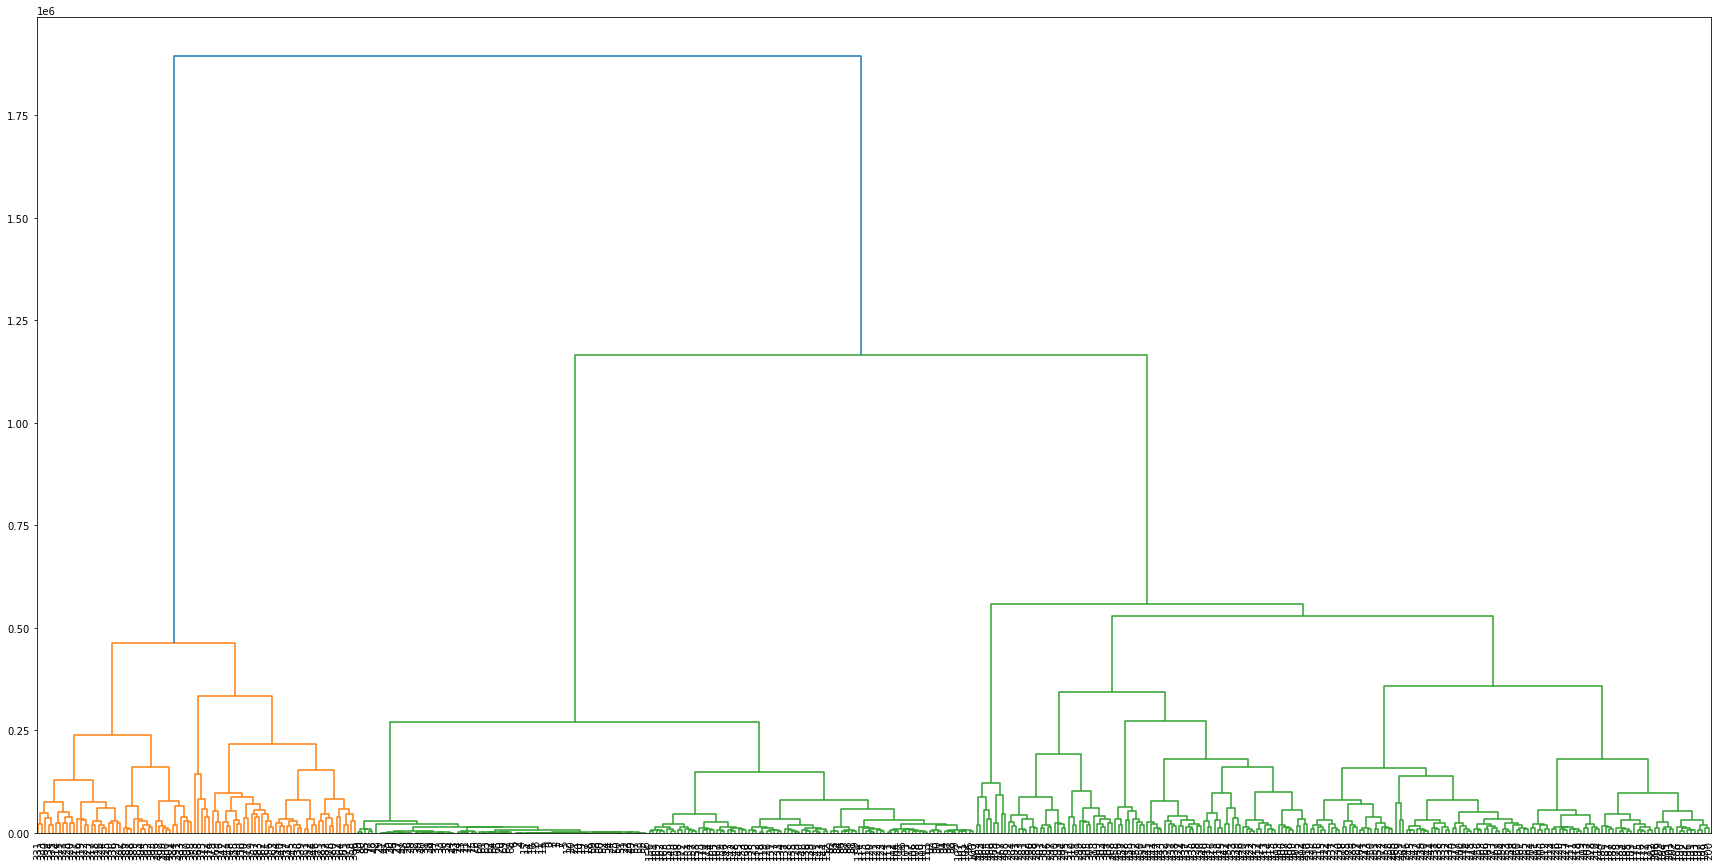

In [49]:

labelList = new_cases.columns

plt.figure(figsize=(30, 15))
dendrogram(linked, leaf_font_size=10, leaf_rotation=90 )

plt.savefig("Clustering1.png")
plt.show()


In [48]:
linked

array([[0.00000000e+00, 3.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.10000000e+01, 1.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [9.00000000e+00, 4.71000000e+02, 1.15470054e+00, 3.00000000e+00],
       ...,
       [9.17000000e+02, 9.37000000e+02, 5.58033153e+05, 2.07000000e+02],
       [9.31000000e+02, 9.38000000e+02, 1.16604105e+06, 3.81000000e+02],
       [9.36000000e+02, 9.39000000e+02, 1.89406361e+06, 4.71000000e+02]])

In [52]:
import numpy as np

In [61]:
# from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import Birch

model = Birch(n_clusters = 8)
model.fit(new_cases)

yhat = model.predict(new_cases)

In [62]:
clusters = np.unique(yhat)



In [63]:
clusters

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [69]:
new_cases.head()

country_name,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Aruba,Australia,Austria,Azerbaijan,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from sklearn.preprocessing import normalize

data_scaled = normalize(new_cases)

In [68]:
pd.DataFrame(data_scaled, columns=new_cases.columns).head()

country_name,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Aruba,Australia,Austria,Azerbaijan,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.997054,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.919145,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


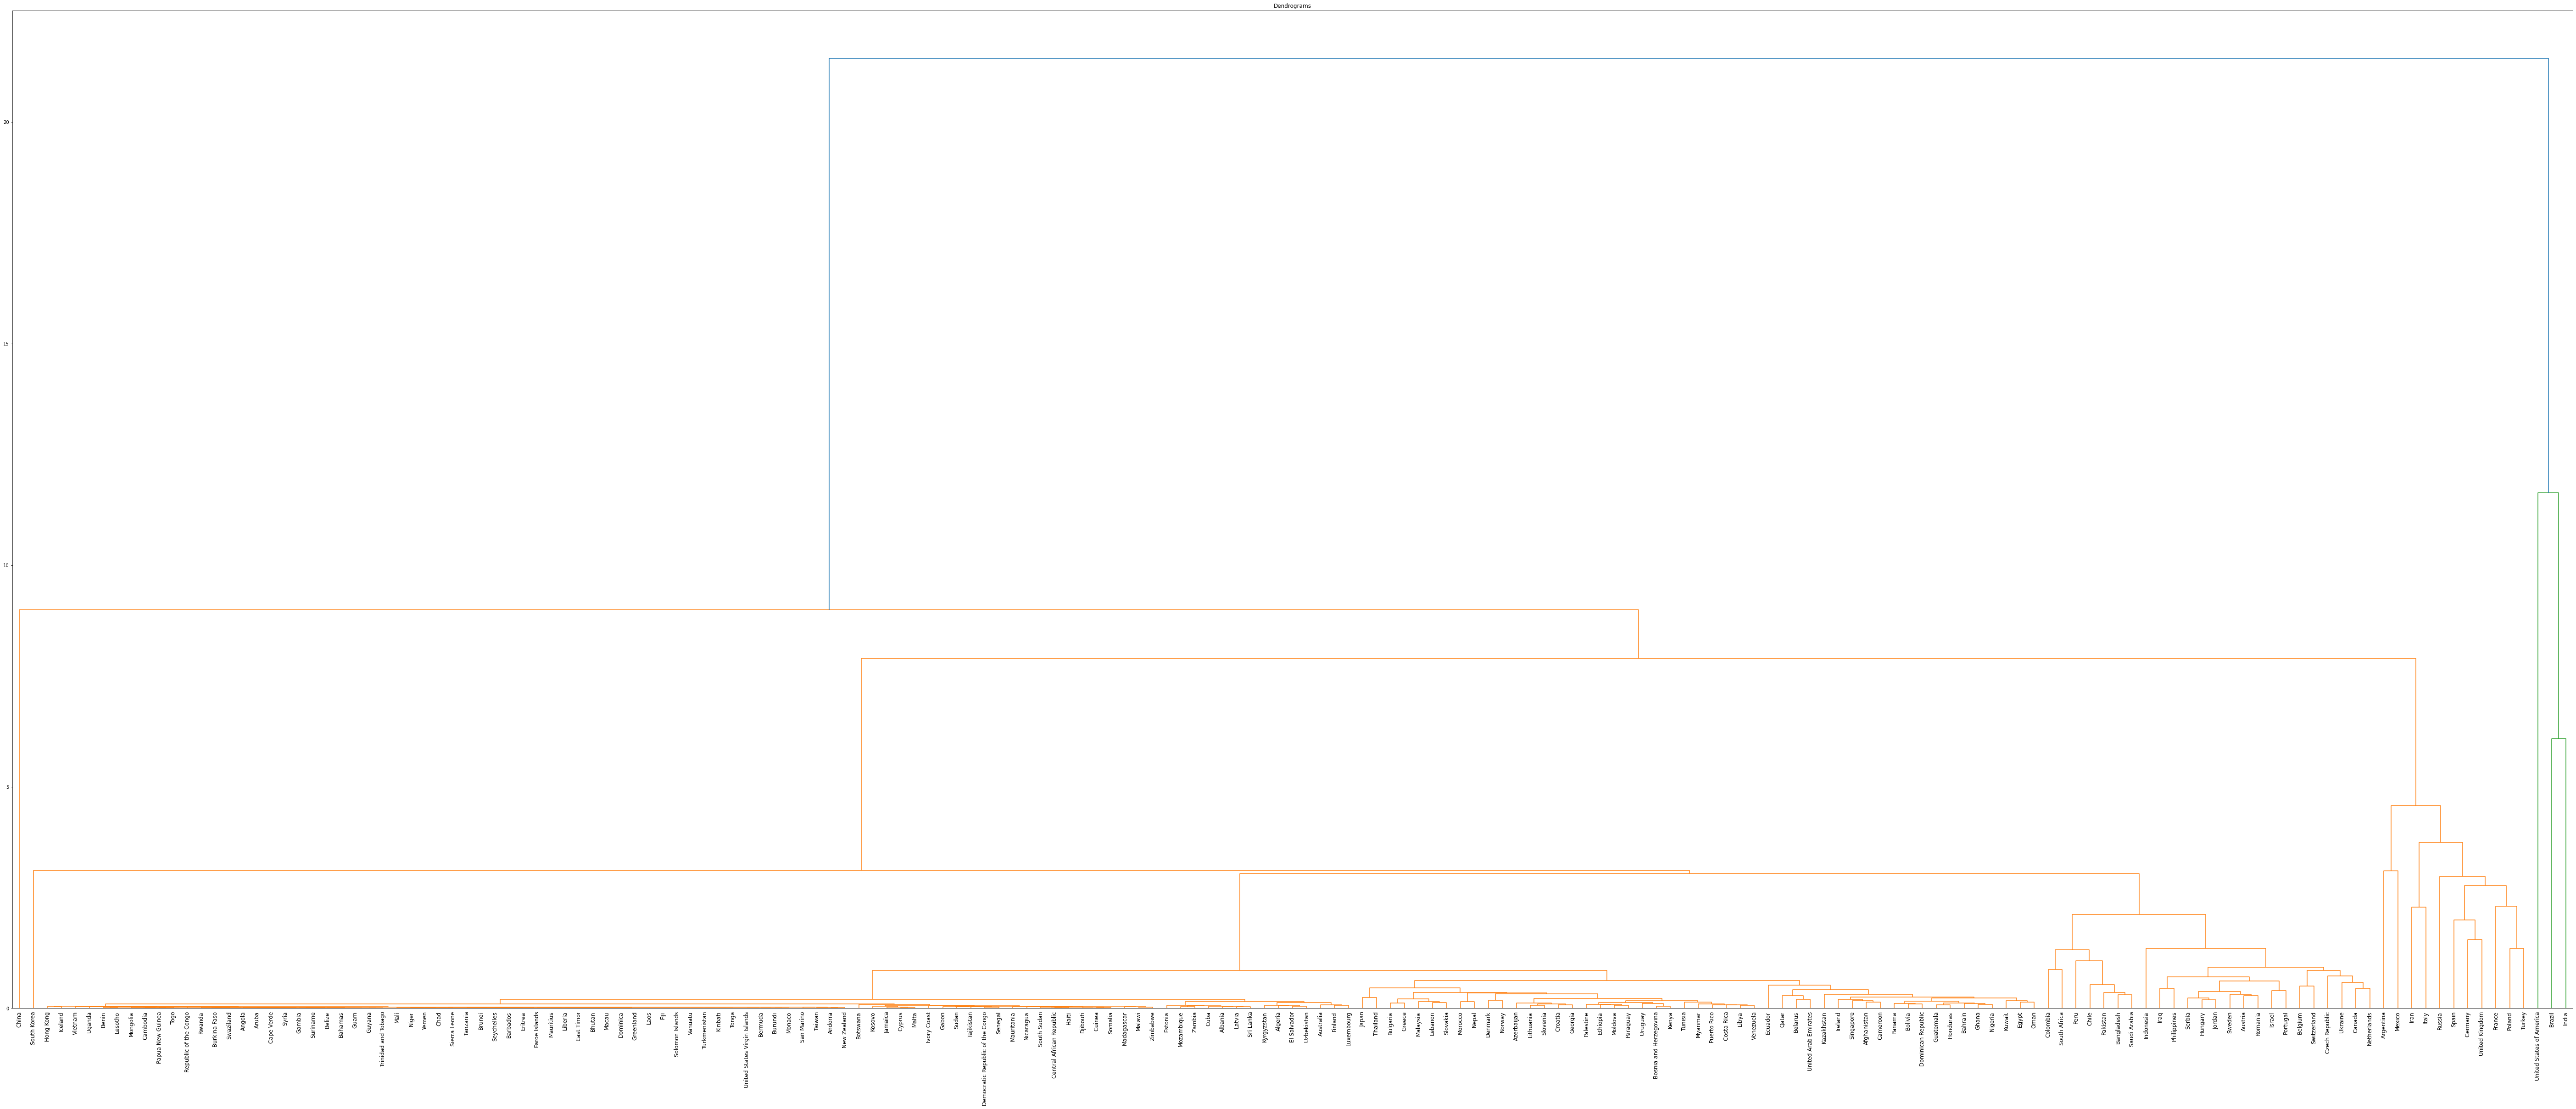

In [77]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(100, 40)  )
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled.T, method='ward'),
                     labels=new_cases.columns,
                     leaf_font_size=12)

plt.savefig("dendrograms_that_dont_suck.png")

In [89]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled.T)

array([0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
clusters = pd.DataFrame([new_cases.columns ,cluster.labels_]).T

In [91]:
clusters.columns = ["country", "cluster"]

In [92]:
clusters.sort_values("cluster").head(20)

,country,cluster
0,Afghanistan,0
112,Mozambique,0
113,Myanmar,0
114,Nepal,0
115,Netherlands,0
116,New Zealand,0
117,Nicaragua,0
118,Niger,0
119,Nigeria,0
111,Morocco,0


In [105]:
clusters[clusters.cluster == 9]

,country,cluster
5,Argentina,9


## Applying a min-max scaling transformation and rerunning




In [107]:
from sklearn.preprocessing import minmax_scale

cases_minmax = minmax_scale(new_cases)
cases_minmax


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10314263, 0.18886199, 0.06101426, ..., 0.35057471, 0.07909605,
        0.01684982],
       [0.03384367, 0.16707022, 0.06973059, ..., 0.43103448, 0.08782743,
        0.02857143],
       [0.06285254, 0.13640032, 0.06616482, ..., 0.43103448, 0.07344633,
        0.03882784]])

In [108]:
cases_minmax = pd.DataFrame(cases_minmax, columns=new_cases.columns )
cases_minmax

country_name,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Aruba,Australia,Austria,Azerbaijan,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000123,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000533,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000287,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.066076,0.192090,0.054675,0.160535,0.354930,0.695704,0.000000,0.012483,0.216081,0.542350,...,0.000000,0.167932,0.471121,0.24000,0.0,0.683342,0.040816,0.465517,0.057011,0.010989
467,0.098308,0.100888,0.051109,0.120401,0.259155,0.439780,0.513333,0.019417,0.225547,0.258594,...,0.269841,0.120203,0.447524,0.22125,0.0,0.567818,0.112245,0.511494,0.017976,0.013919
468,0.103143,0.188862,0.061014,0.110368,0.416901,1.000000,0.086667,0.024965,0.246763,0.552011,...,0.269841,0.156117,0.347236,0.26500,0.0,0.477050,0.102041,0.350575,0.079096,0.016850
469,0.033844,0.167070,0.069731,0.090301,0.405634,0.995368,0.153333,0.019417,0.350125,0.515165,...,0.079365,0.194233,0.309645,0.28375,0.0,0.598247,0.204082,0.431034,0.087827,0.028571


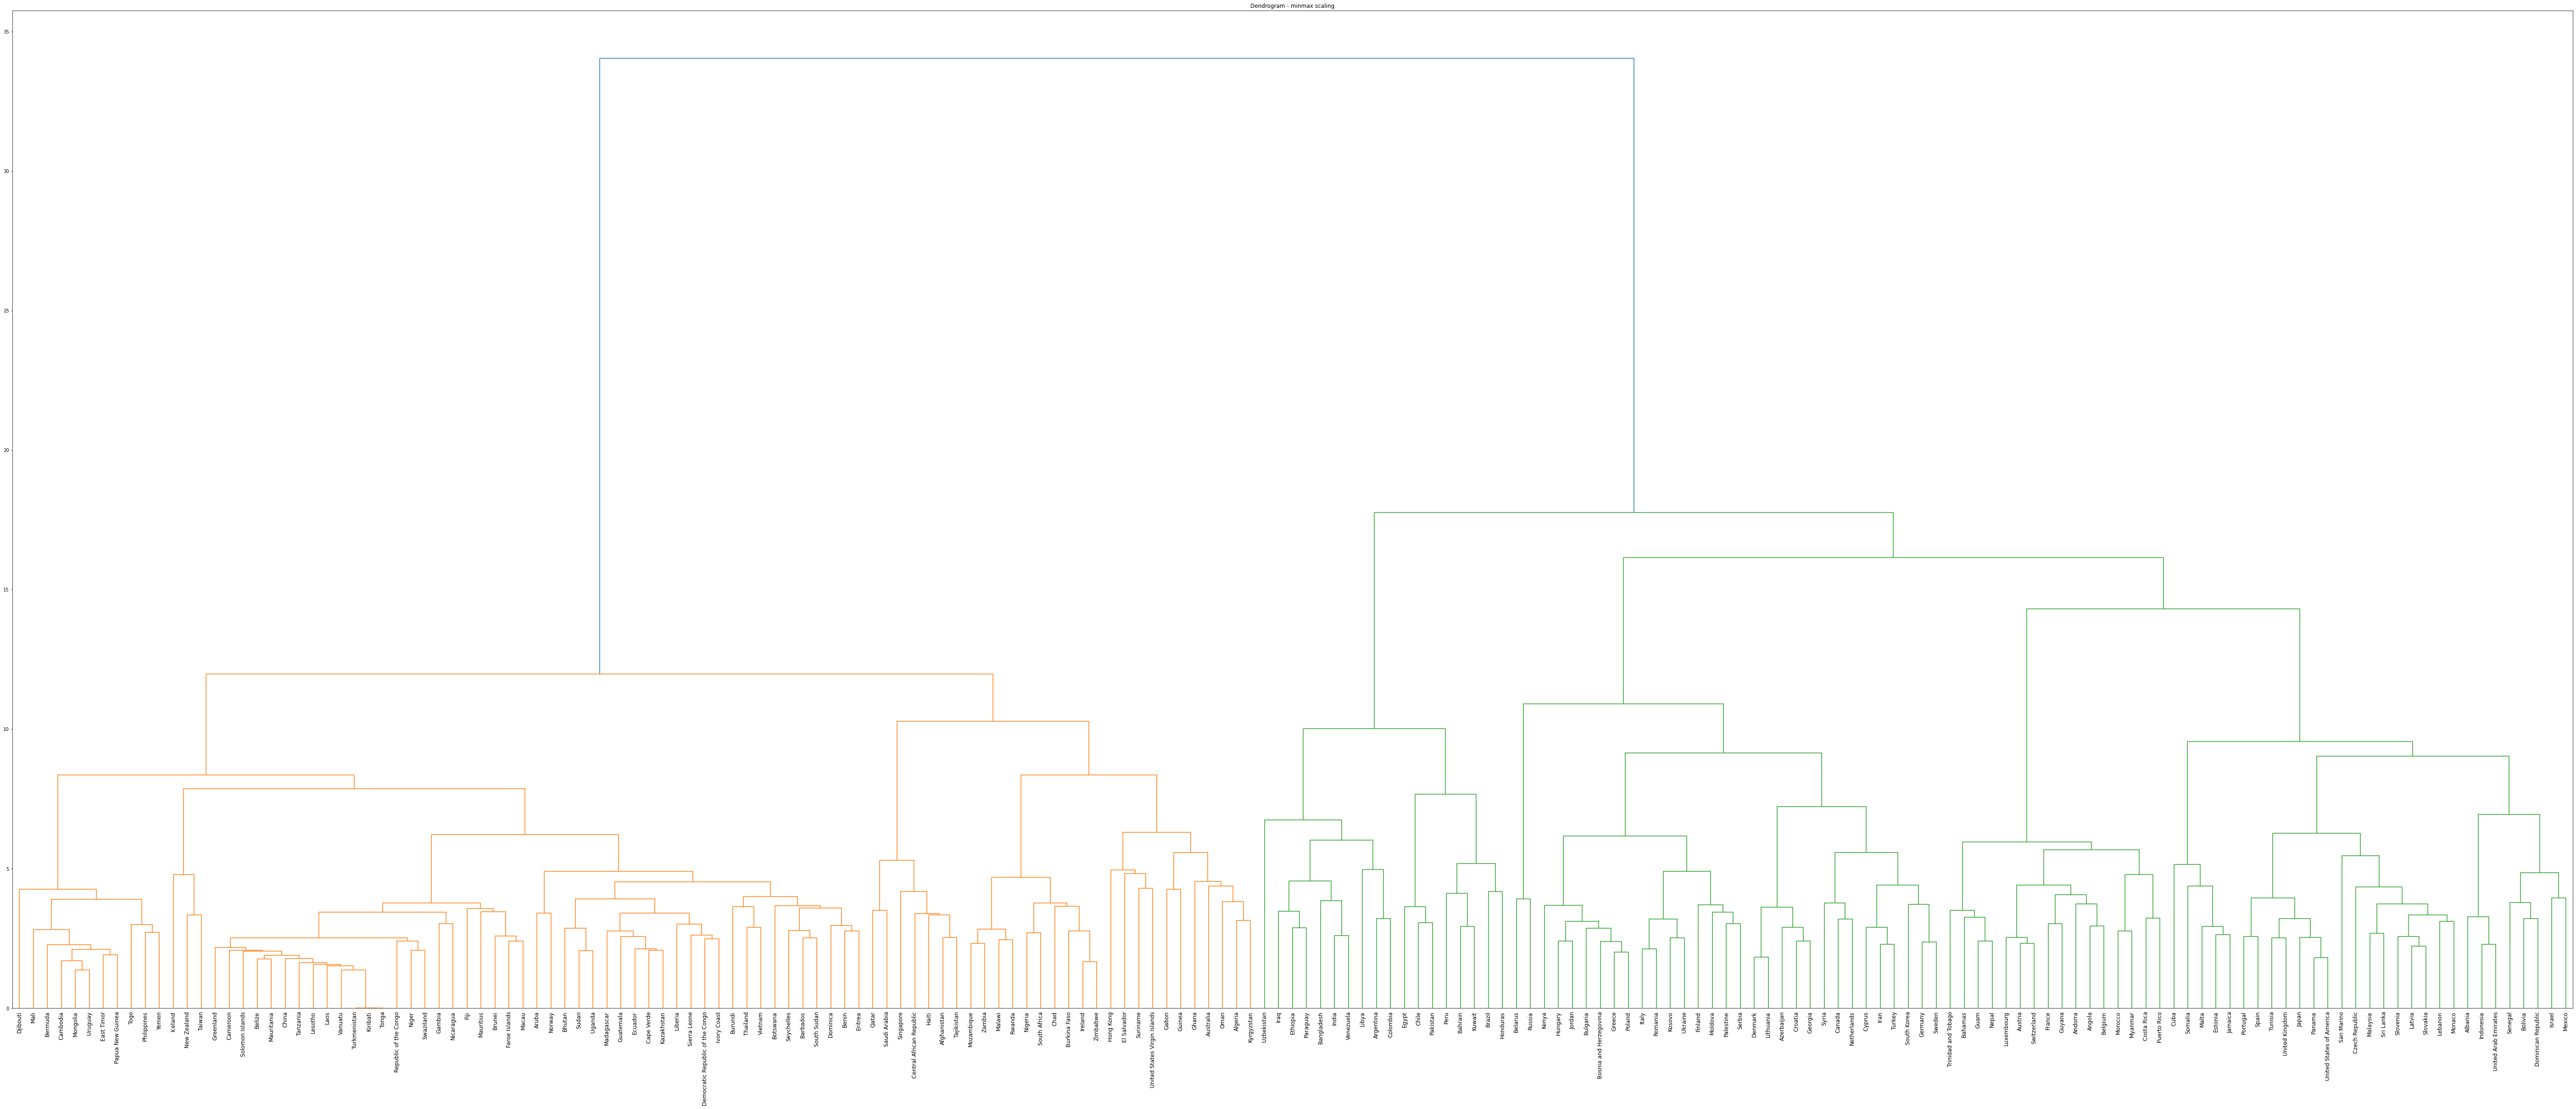

In [109]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(100, 40)  )
plt.title("Dendrogram - minmax scaling")  
dend = shc.dendrogram(shc.linkage(cases_minmax.T, method='ward'),
                     labels=new_cases.columns,
                     leaf_font_size=12)

plt.savefig("dendrograms_that_dont_suck_2.png")

In [119]:
from sklearn.cluster import AgglomerativeClustering
cluster2 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster2.fit_predict(cases_minmax.T)

clusters2 = pd.DataFrame([cases_minmax.columns ,cluster2.labels_]).T
clusters2.columns = ["country", "cluster"]
clusters2.sort_values("cluster").head(20)

,country,cluster
134,Romania,0
167,Turkey,0
88,Kosovo,0
30,Canada,0
61,Germany,0
86,Kenya,0
84,Jordan,0
38,Croatia,0
80,Italy,0
25,Bulgaria,0


In [130]:
clusters2[clusters2.cluster == 0]

,country,cluster
9,Azerbaijan,0
21,Bosnia and Herzegovina,0
25,Bulgaria,0
30,Canada,0
38,Croatia,0
40,Cyprus,0
43,Denmark,0
56,Finland,0
60,Georgia,0
61,Germany,0


## Agglomerative Clustering can be kinda bad, let's try Birch instead


In [173]:
from sklearn.cluster import Birch
cluster3 = Birch(n_clusters=25)  
cluster3.fit_predict(cases_minmax.T)

clusters3 = pd.DataFrame([cases_minmax.columns ,cluster3.labels_]).T
clusters3.columns = ["country", "cluster"]
clusters3.sort_values("cluster").head(20)

,country,cluster
98,Luxembourg,0
57,France,0
157,Switzerland,0
37,Costa Rica,0
15,Belgium,0
68,Guyana,0
113,Myanmar,0
8,Austria,0
131,Puerto Rico,0
4,Angola,0


In [178]:
clusters3[clusters3.cluster == 3]

,country,cluster
0,Afghanistan,3
32,Central African Republic,3
69,Haiti,3
132,Qatar,3
138,Saudi Arabia,3
143,Singapore,3
160,Tajikistan,3


In [171]:
c9 = cases_minmax[clusters3[clusters3.cluster == 9].country]
c9

country_name,Cuba,Estonia,Jamaica,Malta,Somalia
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
466,0.825301,0.223926,0.433941,0.129412,0.414110
467,0.734940,0.137014,0.299544,0.092157,0.490798
468,0.912220,0.326176,0.183371,0.115686,0.000000
469,0.825301,0.280675,0.148064,0.113725,0.831288


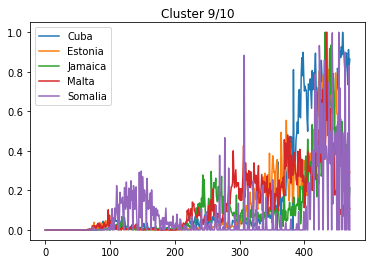

In [172]:

for country in c9.columns:

    plt.plot(c9[country])

plt.title("Cluster 9/10")
plt.legend(c9.columns)
plt.show()

## Further Exploration:
- Smoothing
- 

In [1]:
## Quick check to see if clusters have changed after rerun


In [2]:
import pandas as pd



In [3]:
c1 = pd.read_csv("data/c6_country_clusters_cache.csv")

In [4]:
c2 = pd.read_csv("data/c6_clusters_RERUN.csv")

In [12]:
merged = pd.merge(c1[["country_name", "som_cluster", "value_col"]], 
        c2[["country_name", "som_cluster", "value_col"]], on=["country_name", "value_col"])

problematic = merged[merged["som_cluster_x"] != merged["som_cluster_y"]]

In [17]:
problematic[problematic["value_col"] == "stringency_index"]

,country_name,som_cluster_x,value_col,som_cluster_y
2,Afghanistan,5,stringency_index,3
6,Albania,2,stringency_index,5
13,Algeria,4,stringency_index,2
15,Andorra,2,stringency_index,4
22,Angola,4,stringency_index,2
...,...,...,...,...
808,Vanuatu,5,stringency_index,4
810,Vietnam,2,stringency_index,5
817,Yemen,5,stringency_index,4
823,Zambia,2,stringency_index,4


In [18]:
problematic.groupby("value_col").count()

,country_name,som_cluster_x,som_cluster_y
value_col,,,
new_confirmed_pop_smooth,24,24,24
new_confirmed_smooth,14,14,14
stringency_index,166,166,166


In [19]:
problematic[problematic["value_col"] == "new_confirmed_pop_smooth"]

,country_name,som_cluster_x,value_col,som_cluster_y
36,Austria,5,new_confirmed_pop_smooth,2
67,Belarus,3,new_confirmed_pop_smooth,2
71,Belgium,1,new_confirmed_pop_smooth,4
143,Canada,3,new_confirmed_pop_smooth,2
182,Croatia,1,new_confirmed_pop_smooth,5
249,Estonia,5,new_confirmed_pop_smooth,1
268,France,5,new_confirmed_pop_smooth,2
283,Georgia,1,new_confirmed_pop_smooth,5
296,Greece,3,new_confirmed_pop_smooth,2
326,Hungary,5,new_confirmed_pop_smooth,1
